In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
import h5py
%matplotlib inline

Using TensorFlow backend.


In [12]:
# 自分で設定するパラメータ

# バッチサイズ
batch_size = 2000

# エポック数
epochs = 100

In [13]:
# データ抽出
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one-hot-label に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [14]:
# モデルの構築
model = Sequential()

# 最初の隠れ層(入力784 -> 出力256)
model.add(Dense(256, activation="relu",input_shape=(784,)))
model.add(Dropout(0.1))

# 2つ目の隠れ層(256 -> 出力128)
## 隠れ層は以下の2行をコピペすることで追加できます
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

# 3つ目の隠れ層(128 -> 出力32)
## 隠れ層は以下の2行をコピペすることで追加できます
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

# 出力層(入力32 -> 出力10)
model.add(Dense(10, activation='softmax'))

# モデル概要表示
model.summary()

# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# フィッティング(学習)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# スコアの計算・表示
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                330       
Total para

60000/60000 [==============================] - 2s - loss: 0.4482 - acc: 0.8670 - val_loss: 0.3275 - val_acc: 0.9109
Epoch 55/100
60000/60000 [==============================] - 2s - loss: 0.4431 - acc: 0.8698 - val_loss: 0.3251 - val_acc: 0.9113
Epoch 56/100
60000/60000 [==============================] - 2s - loss: 0.4428 - acc: 0.8684 - val_loss: 0.3228 - val_acc: 0.9114
Epoch 57/100
60000/60000 [==============================] - 2s - loss: 0.4383 - acc: 0.8708 - val_loss: 0.3203 - val_acc: 0.9119
Epoch 58/100
60000/60000 [==============================] - 2s - loss: 0.4346 - acc: 0.8714 - val_loss: 0.3179 - val_acc: 0.9123
Epoch 59/100
60000/60000 [==============================] - 2s - loss: 0.4306 - acc: 0.8732 - val_loss: 0.3160 - val_acc: 0.9134
Epoch 60/100
60000/60000 [==============================] - 2s - loss: 0.4279 - acc: 0.8747 - val_loss: 0.3134 - val_acc: 0.9136
Epoch 61/100
60000/60000 [==============================] - 2s - loss: 0.4225 - acc: 0.8756 - val_loss: 0.3115

In [9]:
model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 0s     


[0.3218956942975521, 0.90890000000000004]

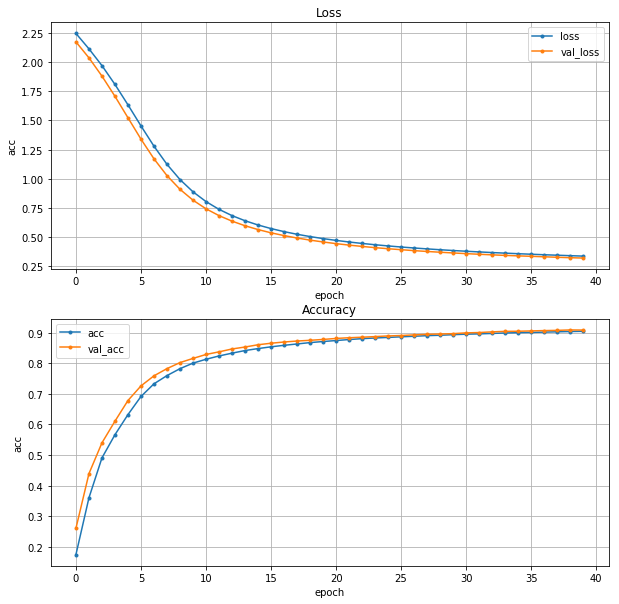

In [10]:
# 学習の様子をプロット
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()